# Introduction 

Hello, I assume by now you have seen my teammates and their notebooks. If not, that is fine. My name is Dokja, I will be speaking to you regarding our dataset regarding FIFA's players information. My goal is to look towards the skills listed for each player and to place their value in a numeric manner. Of course this is in no way to insult the players within the teams; each and every one of them has a potential to exceed one another and to be one of the best soccer player that they can be. Though perhaps this can be used to assist with investments or other company contributions. 

As for a link regarding the dataset, it will be included towards the end, titled as "Resources". This is to allow for a cleaner version of this document and allow for people to have those links accessible to them. Now, I will go through and install all the pips required for this project.

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
%pip install notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Along with the pips, I brought in the imports that will be used as well. Pandas was of course needed for the model, scikit-learning for the machine learning model, the linear regression, and a few more things for the computation. Matplotlib and seaborn are being used to make a proper sort of modeling visual. This permits us to have a closer inspection upon certain elements without purely looking towards the math. 

# Data Utilization and Manipulation 

I title this section as I like to utilize the data, manipulate it, and create both the model and the visualization all within the same space. So from here on I am going to read the file then I plan to remove the columns that are not needed. Some will be explained as I am sure that there could be an argument given what they were but I will explain within each step. 

In [4]:
df = pd.read_csv("fifa_eda_stats.csv")

def parse_value(v):
    if isinstance(v, str):
        v = v.replace("€", "").strip()
        if "M" in v:
            return float(v.replace("M", "")) * 1000000
        if "K" in v:
            return float(v.replace("K","")) * 1000
    return pd.to_numeric(v, errors="coerce")

df['Value'] = df["Value"].apply(parse_value)

So, just for some clarification just due to the amount of stuff going on with the code that I just wrote. So, I am simply clearing up the estimated value of a player as everything is written in British pounds. Also the values are summarized by million with 'M', and thousand with 'K'. Doing these allows me to keep everything within a numeric value.

In [5]:
columns_to_remove = ["ID", "Name", "Nationality", "Club", "Wage", "Preferred Foot", 
    "International Reputation", "Position", "Jersey Number", "Joined", 
    "Loaned From", "Contract Valid Until", "Body Type", "Release Clause"]

df = df.drop(columns=[col for col in columns_to_remove if col in df.columns])
print(df.columns.tolist())

['Age', 'Overall', 'Potential', 'Value', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


From here I will address some of the concerns that could be raised by the removal of certain values. Everything regarding contracts such as the "Release Clause", "Contract Valid Until", and "Loaned From", have been removed as they play no importance to the potential that a player does have. For this very reason, any identifiers for the player such as their position, jersey number, and every their names have been removed as well. Popularity is good for the cameras but not the best for the team itself. 

While it is acknowledged that sports players have to have a good personality to also be a sort of fit for the game, there are variables that are simply hard to quantify and would thus defeat the purpose of this sort of experiment. Thus I kept things that could be quantified. So now I have to train the model so that we could get a tangible element. 

In [11]:
df = df.select_dtypes(include=["int64","float64"])

df = df.dropna(subset=["Value"])
df = df.dropna()
x = df.drop(columns=['Value'])
y = df["Value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)

rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("RMSE:", rmse)
print("R2 score: ", r2)

RMSE: 16664462441909.914
R2 score:  0.4552147171482641


Now, I know that I did a lot so I am going to explain. Firstly with "df.select_dtypes" will permit me to exclude anything that is not an integer or float. Now it may be asked as to why I just did not remove it as I removed some of the previous data points. But it is a form of insurance, especially as I focus on the numeric values. From there, I had to make sure that I removed nulls. Originally the plan was just to remove the nulls from "Value" but then I got an error for some other items, so I removed the nulls from everything. As for why I dropped "Value". It is because "Value" is focused closer to a player's networth and would not be needed for the linear regression, though it will be used for an actual visual model to compare. Following that, I made he actual model itself and tested it, producing the RMSE and R2 score as can be seen above.

In [13]:
coeff_df = pd.DataFrame({"Features:": x.columns, "Coefficient": model.coef_}).sort_values(by="Coefficient", ascending=False)
coeff_df

,Features:,Coefficient
1,Overall,556934.624807
4,Skill Moves,274407.284322
3,Weak Foot,134708.841322
18,Reactions,59746.026236
2,Potential,51023.381862
9,Volleys,31125.422805
28,Vision,21102.090920
19,Balance,12759.440393
6,Finishing,11785.532817
12,FKAccuracy,11744.445883


This is not the visual but I just wanted to include a list of everything and by how much of an importance it has. Just in case the numbers were wanted.

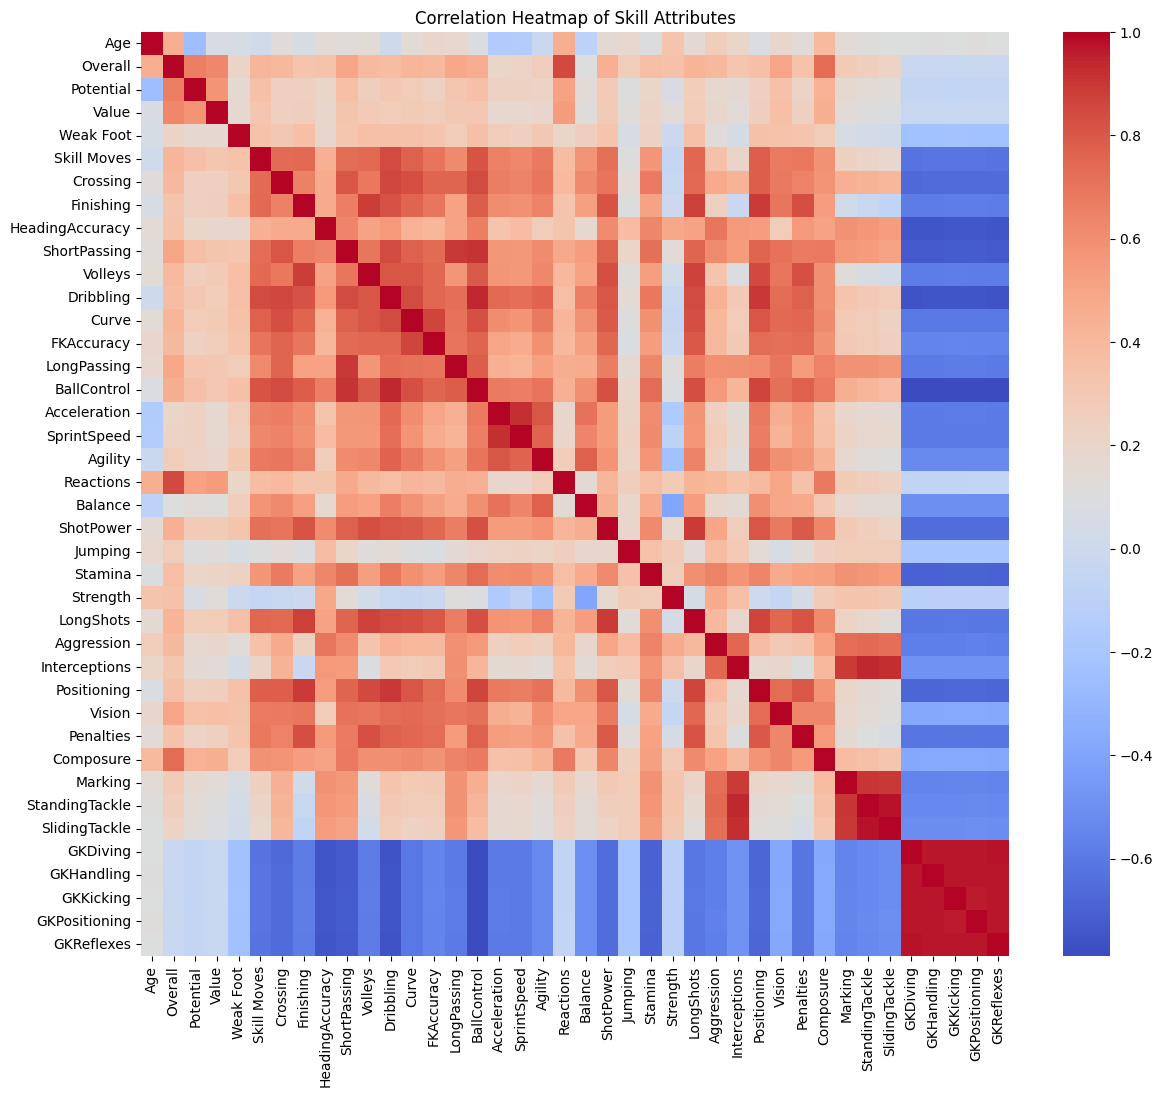

In [15]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Skill Attributes")
plt.show()

I believe that a heatmap would have been the best visual to utilize as it shows not only the values that were included and their importance but also comparing them to other values. Though this will conclude my section of the project regarding the players and their value based on physical attributes and their skills. Thank you for attending my Ted Talk.

# Resources
https://www.kaggle.com/datasets/mukeshmanral/fifa-data-for-eda-and-stats?resource=download 